Problem Statement:

In the 1840s, Vienna General Hospital faced alarmingly high mortality rates among women giving birth, 
particularly in Clinic 1. Dr. Ignaz Semmelweis observed that doctors frequently moved from autopsies to deliveries without washing 
their hands — a practice he suspected was spreading infection.

In mid-1847, he introduced a handwashing policy using chlorinated lime. 
This project aims to analyze historical hospital data to determine whether the introduction of handwashing significantly 
reduced mortality rates.

Using exploratory data analysis and statistical testing, we investigate:

* How mortality trends varied between Clinic 1 and Clinic 2.
* Whether handwashing led to a statistically significant drop in death rates in Clinic 1.
* How data and simple hygiene practices intersected to save lives — over a century before germ theory was fully accepted.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
monthly = pd.read_csv("monthly_deaths.csv")

print("Shape: ", monthly.shape)
print("Columns: ",list(monthly.columns))

Shape:  (98, 4)
Columns:  ['date', 'births', 'deaths', 'clinic']


In [3]:
print("==Data Overview==")
print(monthly.info)

==Data Overview==
<bound method DataFrame.info of           date  births  deaths    clinic
0   1841-01-01     254      37  clinic 1
1   1841-02-01     239      18  clinic 2
2   1841-03-01     277      12  clinic 1
3   1841-04-01     255       4  clinic 2
4   1841-05-01     255       2  clinic 1
..         ...     ...     ...       ...
93  1848-11-01     310       9  clinic 2
94  1848-12-01     373       5  clinic 1
95  1849-01-01     403       9  clinic 2
96  1849-02-01     389      12  clinic 1
97  1849-03-01     406      20  clinic 2

[98 rows x 4 columns]>


In [4]:
print("First 7 rows: \n", monthly.head(7))

First 7 rows: 
          date  births  deaths    clinic
0  1841-01-01     254      37  clinic 1
1  1841-02-01     239      18  clinic 2
2  1841-03-01     277      12  clinic 1
3  1841-04-01     255       4  clinic 2
4  1841-05-01     255       2  clinic 1
5  1841-06-01     200      10  clinic 2
6  1841-07-01     190      16  clinic 1


In [5]:
print("Summary Statistics:")
print(monthly.describe(include='all'))

Summary Statistics:
              date      births     deaths    clinic
count           98   98.000000  98.000000        98
unique          98         NaN        NaN         2
top     1841-01-01         NaN        NaN  clinic 1
freq             1         NaN        NaN        49
mean           NaN  267.000000  22.469388       NaN
std            NaN   41.769372  18.141031       NaN
min            NaN  190.000000   0.000000       NaN
25%            NaN  242.500000   8.000000       NaN
50%            NaN  264.000000  16.500000       NaN
75%            NaN  292.750000  36.750000       NaN
max            NaN  406.000000  75.000000       NaN


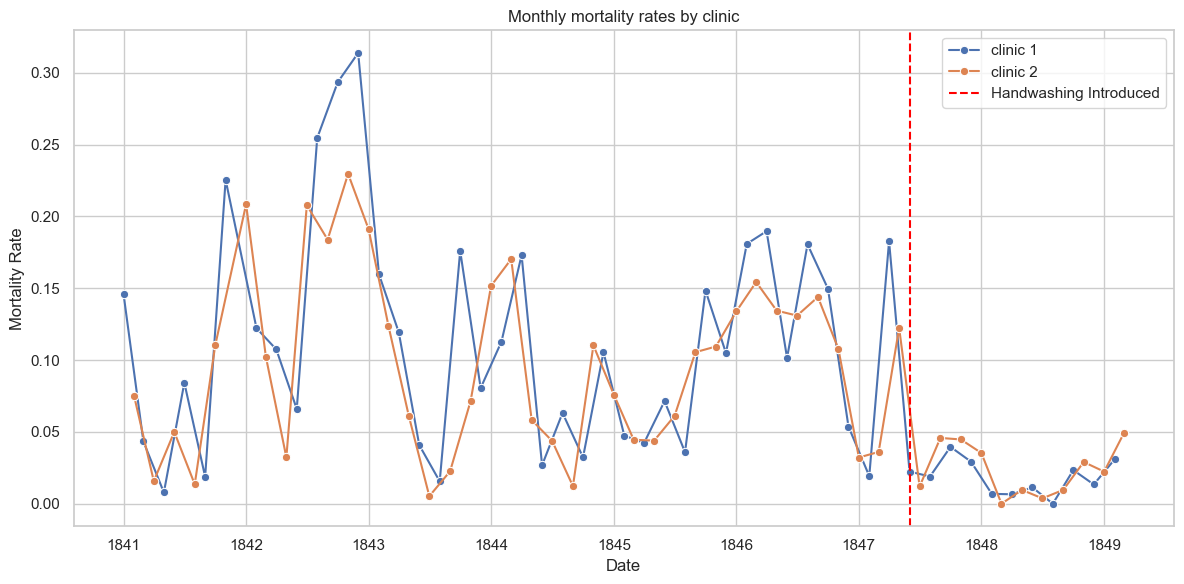

In [6]:
monthly['date'] = pd.to_datetime(monthly['date'])       #date parsing
monthly['mortality_rate'] = monthly['deaths'] / monthly['births'] #mortality rate calculation

#handwashing marker (1847)
handwashing_start = pd.to_datetime('1847-06-01')
monthly['handwashing_introduced'] = monthly['date']>=handwashing_start


#--EDA--

# 1. mortality over time
 
plt.figure()
sns.lineplot(data=monthly, x='date', y='mortality_rate', hue='clinic', marker='o')
plt.axvline(handwashing_start, color='red', linestyle='--', label='Handwashing Introduced')
plt.title('Monthly mortality rates by clinic')
plt.ylabel('Mortality Rate')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
#2. Average mortality before vs. after handwashing in Clinic 1
clinic1 = monthly[monthly['clinic'] == 'clinic 1']
before = clinic1[clinic1['handwashing_introduced'] == False]['mortality_rate']
after = clinic1[clinic1['handwashing_introduced'] == True]['mortality_rate']


print("Mean mortality rates: ")
print(f"Before handwashing: {before.mean():.4f}")
print(f"After handwashing: {after.mean():.4f}")
print("\nClinic-1 sample sizes: ")
print(f"Before handwashing: {len(before)} months")
print(f"After handwashing: {len(after)} months")

print("\nSample mortality rates (First 5 values): ")
print("Before handwashing: ", before.head().values)
print("After handwashing: ", after.head().values)



Mean mortality rates: 
Before handwashing: 0.1131
After handwashing: 0.0184

Clinic-1 sample sizes: 
Before handwashing: 38 months
After handwashing: 11 months

Sample mortality rates (First 5 values): 
Before handwashing:  [0.14566929 0.0433213  0.00784314 0.08421053 0.01877934]
After handwashing:  [0.02238806 0.01893939 0.03956835 0.02930403 0.00687285]


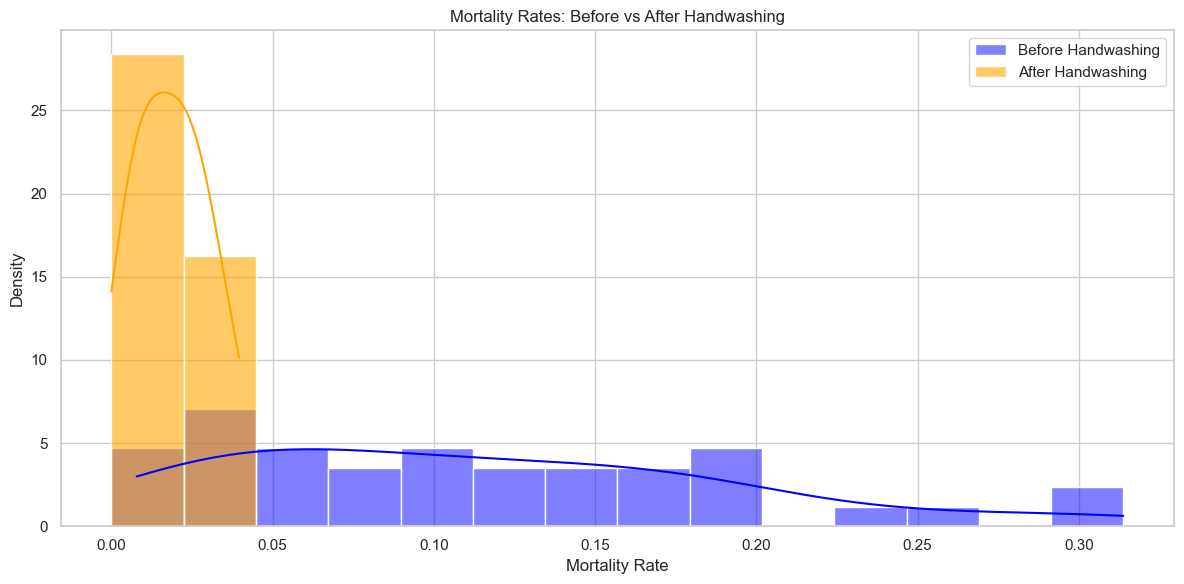

In [8]:
#histograms of mortality rates before vs after
plt.figure()
BINS = np.linspace(0, max(before.max(), after.max()), 15)
sns.histplot(before, color='blue', label='Before Handwashing', stat='density', bins=BINS, kde=True)
sns.histplot(after, color='orange', label='After Handwashing', stat='density', kde=True, bins=BINS, alpha=0.6)
plt.title('Mortality Rates: Before vs After Handwashing')
plt.ylabel('Density')
plt.xlabel('Mortality Rate')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\91898\AppData\Local\Temp\ipykernel_10884\2681728017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=box_df, x='Period', y='Mortality Rate', palette=["blue", "orange"])


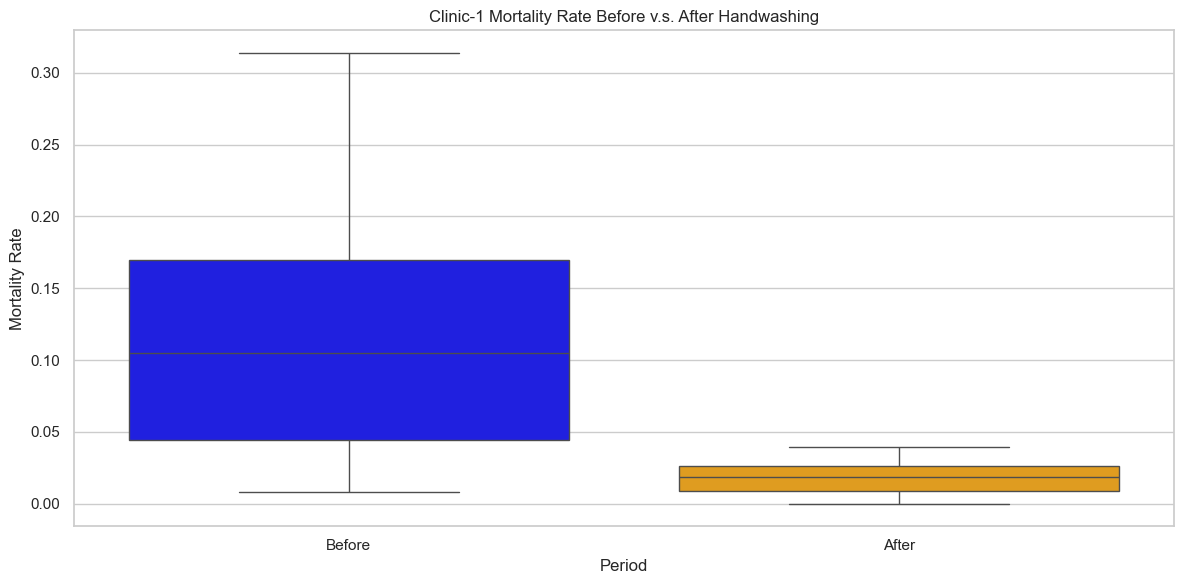

In [ ]:
#boxplot comparison
box_df = pd.DataFrame({
    "Mortality Rate": pd.concat([before, after]),
    "Period": ["Before"]*len(before) + ["After"]*len(after)
})
plt.figure()
sns.boxplot(data=box_df, x='Period', y='Mortality Rate', palette=["blue", "orange"])
plt.title('Clinic-1 Mortality Rate Before v.s. After Handwashing')
plt.tight_layout()
plt.show()

In [10]:
#--Statistical Inference--

t_stat, p_value = ttest_ind(before, after, equal_var=False)
print(f"T-test Results:\nT-statistic = {t_stat:.4f}\nP-value = {p_value:.15f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant drop in mortality rate after handwashing introduction.")
else:
    print("Conclusion: No significance difference detected")

monthly.to_csv("updated_monthly_data.csv", index=False)

T-test Results:
T-statistic = 7.1379
P-value = 0.000000008986033
Conclusion: Statistically significant drop in mortality rate after handwashing introduction.


In [ ]:
# Summary:
# This analysis shows a strong and statistically significant reduction in mortality after handwashing was introduced.
# It highlights how data-driven decisions can change public health outcomes dramatically.